In [3]:
import pandas as pd

import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [738]:
dataloc = '../data/EMS_Incident_Dispatch_Data.csv'

usecols = ['CAD_INCIDENT_ID','INCIDENT_DATETIME','FINAL_CALL_TYPE', 'FINAL_SEVERITY_LEVEL_CODE', 'FIRST_ASSIGNMENT_DATETIME', 
           'VALID_DISPATCH_RSPNS_TIME_INDC', 'DISPATCH_RESPONSE_SECONDS_QY', 'FIRST_ACTIVATION_DATETIME', 'FIRST_ON_SCENE_DATETIME', 'VALID_INCIDENT_RSPNS_TIME_INDC',
           'INCIDENT_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY', 'INCIDENT_CLOSE_DATETIME', 'HELD_INDICATOR', 'INCIDENT_DISPOSITION_CODE', 
           'BOROUGH', 'INCIDENT_DISPATCH_AREA', 'ZIPCODE', 'REOPEN_INDICATOR', 'SPECIAL_EVENT_INDICATOR', 'STANDBY_INDICATOR', 'TRANSFER_INDICATOR' ]
inp_data = pd.read_csv(dataloc, usecols=usecols)  # dtype={'ZIPCODE': int, 'POLICEPRECINCT':int, 'CITYCOUNCILDISTRICT':int, 'COMMUNITYDISTRICT': int, 'COMMUNITYSCHOOLDISTRICT': int, 'CONGRESSIONALDISTRICT':int}

print(inp_data.shape)
inp_data.info()

(7023225, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023225 entries, 0 to 7023224
Data columns (total 22 columns):
CAD_INCIDENT_ID                   int64
INCIDENT_DATETIME                 object
FINAL_CALL_TYPE                   object
FINAL_SEVERITY_LEVEL_CODE         int64
FIRST_ASSIGNMENT_DATETIME         object
VALID_DISPATCH_RSPNS_TIME_INDC    object
DISPATCH_RESPONSE_SECONDS_QY      int64
FIRST_ACTIVATION_DATETIME         object
FIRST_ON_SCENE_DATETIME           object
VALID_INCIDENT_RSPNS_TIME_INDC    object
INCIDENT_RESPONSE_SECONDS_QY      float64
INCIDENT_TRAVEL_TM_SECONDS_QY     float64
INCIDENT_CLOSE_DATETIME           object
HELD_INDICATOR                    object
INCIDENT_DISPOSITION_CODE         float64
BOROUGH                           object
INCIDENT_DISPATCH_AREA            object
ZIPCODE                           float64
REOPEN_INDICATOR                  object
SPECIAL_EVENT_INDICATOR           object
STANDBY_INDICATOR                 object
TRANSFER_IN

In [739]:
# Count the number of missing values in each column

print('Columns with Missing Entries: ')
for column in inp_data.columns:
    missing = inp_data[column].isnull().sum()
    if missing > 0:
        print(column + ': ' + str(missing))
        
# Why are there entries having travel time as 0? Was the ambulance not dispatched. or was there some error while recording the data? 
# Could travel time ever actually be zero? FOr example. In case of events where there is an ambulance standing by eg. Marathon/ parade etc? 

Columns with Missing Entries: 
FIRST_ASSIGNMENT_DATETIME: 49096
FIRST_ACTIVATION_DATETIME: 62105
FIRST_ON_SCENE_DATETIME: 224095
INCIDENT_RESPONSE_SECONDS_QY: 225204
INCIDENT_TRAVEL_TM_SECONDS_QY: 224204
INCIDENT_CLOSE_DATETIME: 2947
INCIDENT_DISPOSITION_CODE: 57547
ZIPCODE: 144723


In [740]:
# The records for which the first assignment datetime is missing also have the valid response indicator set to False
len(inp_data[(inp_data['FIRST_ASSIGNMENT_DATETIME'].isnull()) & (inp_data['VALID_INCIDENT_RSPNS_TIME_INDC'] == 'N')])

49096

In [741]:
# Rows with missing zipcode having valid response indicator set to N
len(inp_data[(inp_data['ZIPCODE'].isnull()) & (inp_data['VALID_INCIDENT_RSPNS_TIME_INDC'] == 'N')])

9618

In [742]:
len(inp_data[inp_data['VALID_INCIDENT_RSPNS_TIME_INDC'] == 'N'])

225204

In [743]:
notsent = inp_data['INCIDENT_DISPOSITION_CODE'].value_counts()
len(notsent)
notsent.head(10)

82.0    4979412
93.0     779097
90.0     610486
96.0     241124
87.0     229513
91.0      71597
83.0      48032
94.0       5737
95.0        636
92.0         44
Name: INCIDENT_DISPOSITION_CODE, dtype: int64

In [744]:
# Filter out the rows having 'VALID_INCIDENT_RSPNS_TIME_INDC' as 'N'
inp_data = inp_data[inp_data['VALID_INCIDENT_RSPNS_TIME_INDC'] == 'Y']
inp_data.shape

(6798021, 22)

In [745]:
# Convert the columns to appropriate datatypes
inp_data['INCIDENT_RESPONSE_SECONDS_QY'] = inp_data['INCIDENT_RESPONSE_SECONDS_QY'].fillna(0.0).astype(int,copy=False)
inp_data['INCIDENT_TRAVEL_TM_SECONDS_QY'] = inp_data['INCIDENT_TRAVEL_TM_SECONDS_QY'].fillna(0.0).astype(int,copy=False)
inp_data['INCIDENT_DATETIME'] = pd.to_datetime(inp_data['INCIDENT_DATETIME'],format='%m/%d/%Y %I:%M:%S %p')

In [746]:
pd.set_option('display.max_columns', None)
inp_data.head(10)

,CAD_INCIDENT_ID,INCIDENT_DATETIME,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,INCIDENT_CLOSE_DATETIME,HELD_INDICATOR,INCIDENT_DISPOSITION_CODE,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
0,130010001,2013-01-01 00:00:04,RESPIR,4,01/01/2013 12:01:45 AM,Y,101,01/01/2013 12:01:51 AM,01/01/2013 12:13:21 AM,Y,797,696,01/01/2013 01:04:56 AM,N,82.0,BRONX,B3,10472.0,N,N,N,N
1,130010002,2013-01-01 00:00:19,CARD,3,01/01/2013 12:01:18 AM,Y,59,01/01/2013 12:02:08 AM,01/01/2013 12:14:30 AM,Y,851,792,01/01/2013 12:55:34 AM,N,93.0,BRONX,B1,10454.0,N,N,N,N
2,130010004,2013-01-01 00:01:04,ARREST,1,01/01/2013 12:01:33 AM,Y,29,01/01/2013 12:01:58 AM,01/01/2013 12:08:13 AM,Y,429,400,01/01/2013 12:38:05 AM,N,83.0,QUEENS,Q3,11418.0,N,N,N,N
3,130010005,2013-01-01 00:01:16,SICK,6,01/01/2013 12:02:12 AM,Y,56,01/01/2013 12:02:55 AM,01/01/2013 12:15:04 AM,Y,828,772,01/01/2013 01:20:28 AM,N,82.0,BRONX,B2,10453.0,N,N,N,N
4,130010006,2013-01-01 00:01:26,INJURY,5,01/01/2013 12:01:58 AM,Y,32,01/01/2013 12:02:55 AM,01/01/2013 12:15:42 AM,Y,856,824,01/01/2013 12:53:12 AM,N,82.0,BRONX,B2,10457.0,N,N,N,N
5,130010007,2013-01-01 00:01:35,ASTHMB,2,01/01/2013 12:01:51 AM,Y,16,01/01/2013 12:01:59 AM,01/01/2013 12:05:39 AM,Y,244,228,01/01/2013 12:47:48 AM,N,93.0,MANHATTAN,M3,10017.0,N,N,N,N
6,130010008,2013-01-01 00:01:52,INJURY,5,01/01/2013 12:02:05 AM,Y,13,01/01/2013 12:02:11 AM,01/01/2013 12:08:07 AM,Y,375,362,01/01/2013 12:41:52 AM,N,93.0,RICHMOND / STATEN ISLAND,S2,10306.0,N,N,N,N
7,130010009,2013-01-01 00:02:11,DRUG,4,01/01/2013 12:02:23 AM,Y,12,01/01/2013 12:02:36 AM,01/01/2013 12:09:19 AM,Y,428,416,01/01/2013 01:19:11 AM,N,82.0,RICHMOND / STATEN ISLAND,S1,10301.0,N,N,N,N
8,130010010,2013-01-01 00:02:56,UNC,2,01/01/2013 12:03:15 AM,Y,19,01/01/2013 12:03:27 AM,01/01/2013 12:08:19 AM,Y,323,304,01/01/2013 01:27:51 AM,N,82.0,MANHATTAN,M1,10013.0,N,N,N,N
9,130010011,2013-01-01 00:03:12,DIFFBR,2,01/01/2013 12:03:37 AM,Y,25,01/01/2013 12:03:45 AM,01/01/2013 12:06:04 AM,Y,172,147,01/01/2013 01:29:46 AM,N,82.0,BRONX,B4,10467.0,N,N,N,N


In [747]:
# Clean the data: Determine the columns needed and keep only those columns
# Determine the appropriate datatypes and configure the pandas dataframe to use those datatypes: eg int for zipcode
# Get exploratory plots of the data 

# By zipcode
# By time of the day
# Weekday vs weekend
# Seasonal variations
# Monthly
# Type of call
# By response time

In [748]:
# Analysis by zipcode
zipcode_counts = inp_data['ZIPCODE'].value_counts()
print(type(zipcode_counts))
zipcode_counts.head(5)

<class 'pandas.core.series.Series'>


10456.0    131287
11207.0    124735
11212.0    114702
10457.0    111551
11208.0     99941
Name: ZIPCODE, dtype: int64

In [749]:
num_zipcodes = len(zipcode_counts)
print('Nuumber of unique zipcodes: ' + str(num_zipcodes))
print('Maximum number of calls: ' + str(zipcode_counts.iloc[0]) + ' from zipcode: ' + str(int(zipcode_counts.index[0])))
print('Minimum number of calls: ' + str(zipcode_counts.iloc[-1]) + ' from zipcode: ' + str(int(zipcode_counts.index[-1])))
print('Mean number of calls: ' + str(zipcode_counts.mean()))
print('Median number of calls: ' + str(zipcode_counts.median()))

Nuumber of unique zipcodes: 236
Maximum number of calls: 131287 from zipcode: 10456
Minimum number of calls: 1 from zipcode: 10175
Mean number of calls: 28232.694915254237
Median number of calls: 20738.0


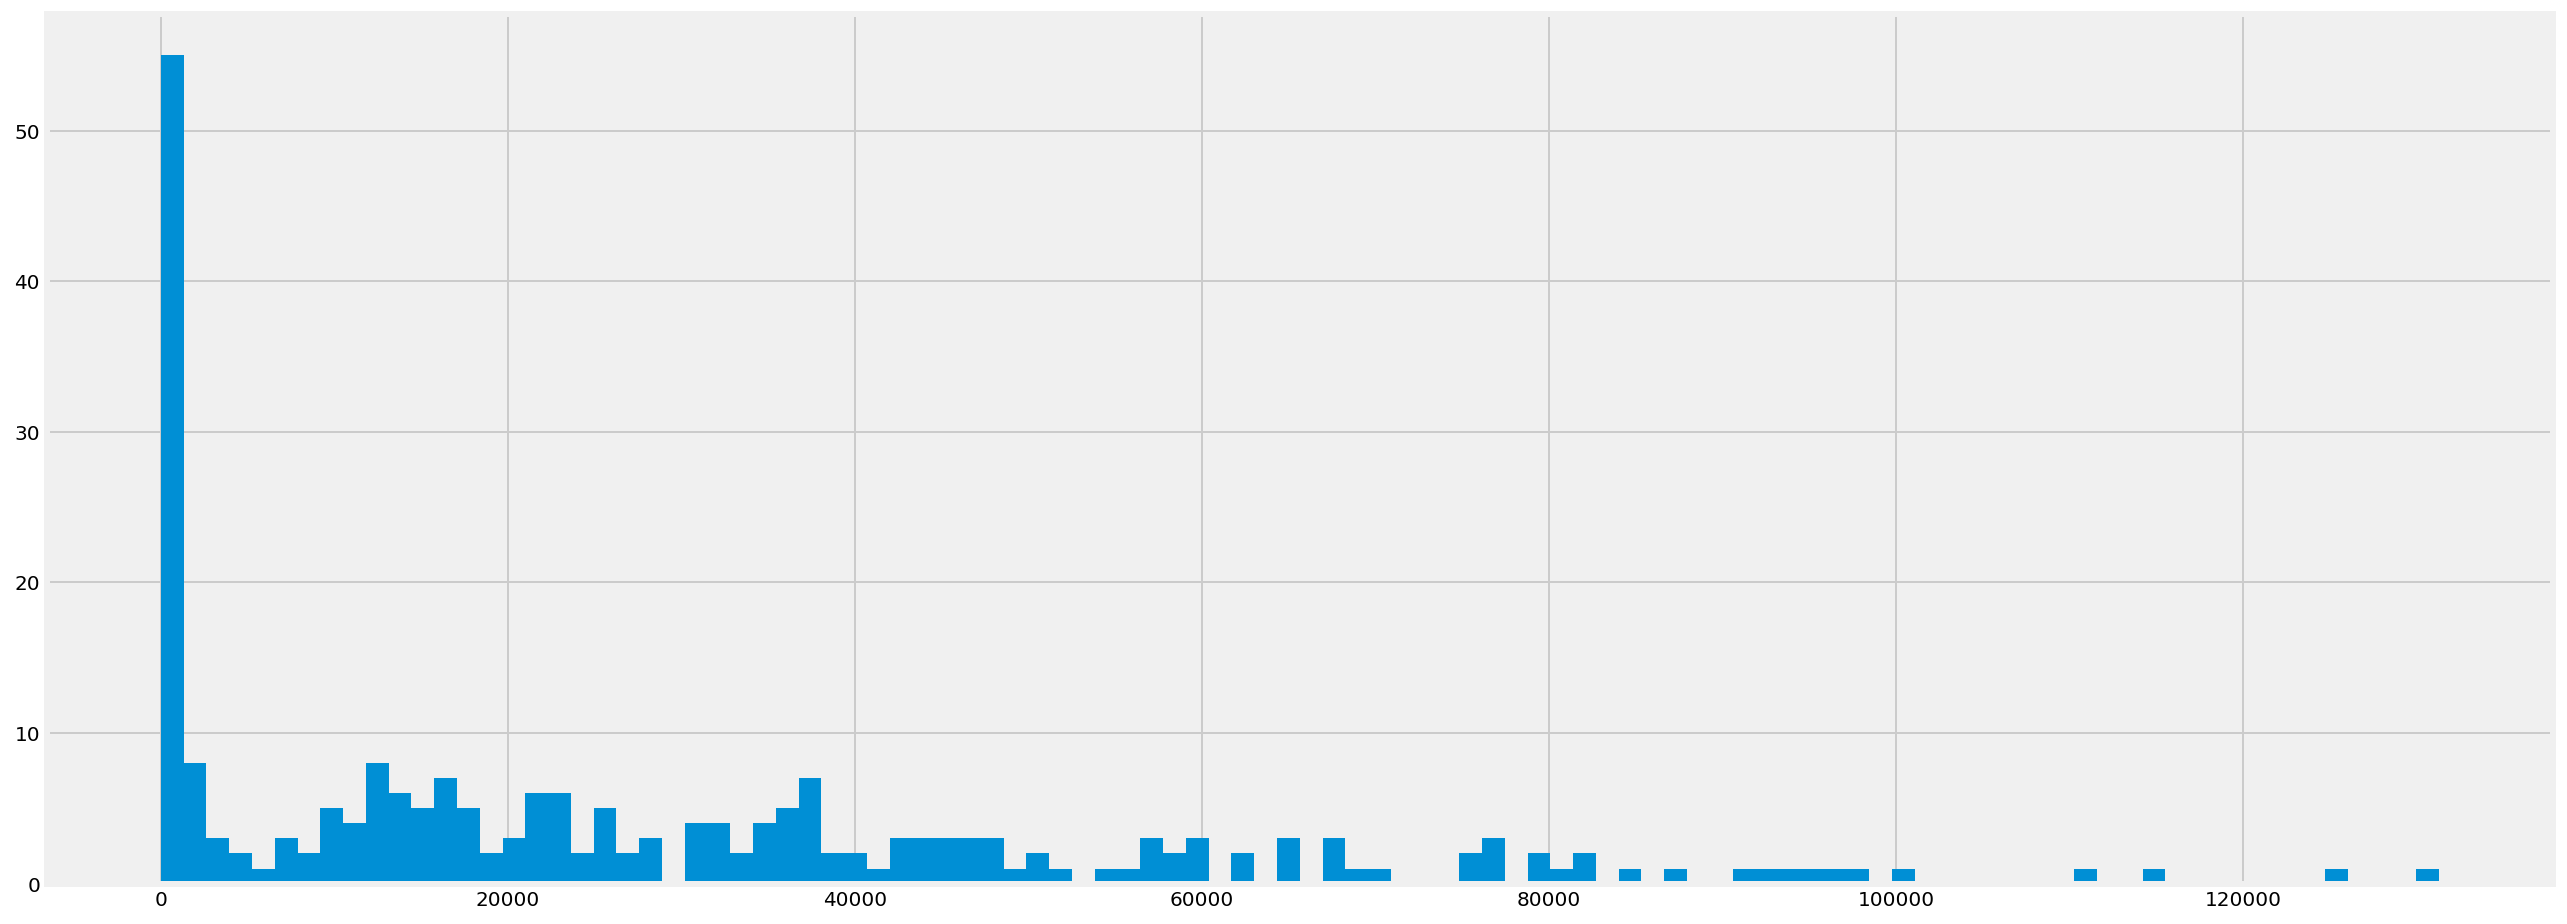

In [750]:
zipcode_counts.hist(bins=100, figsize=(20,8))

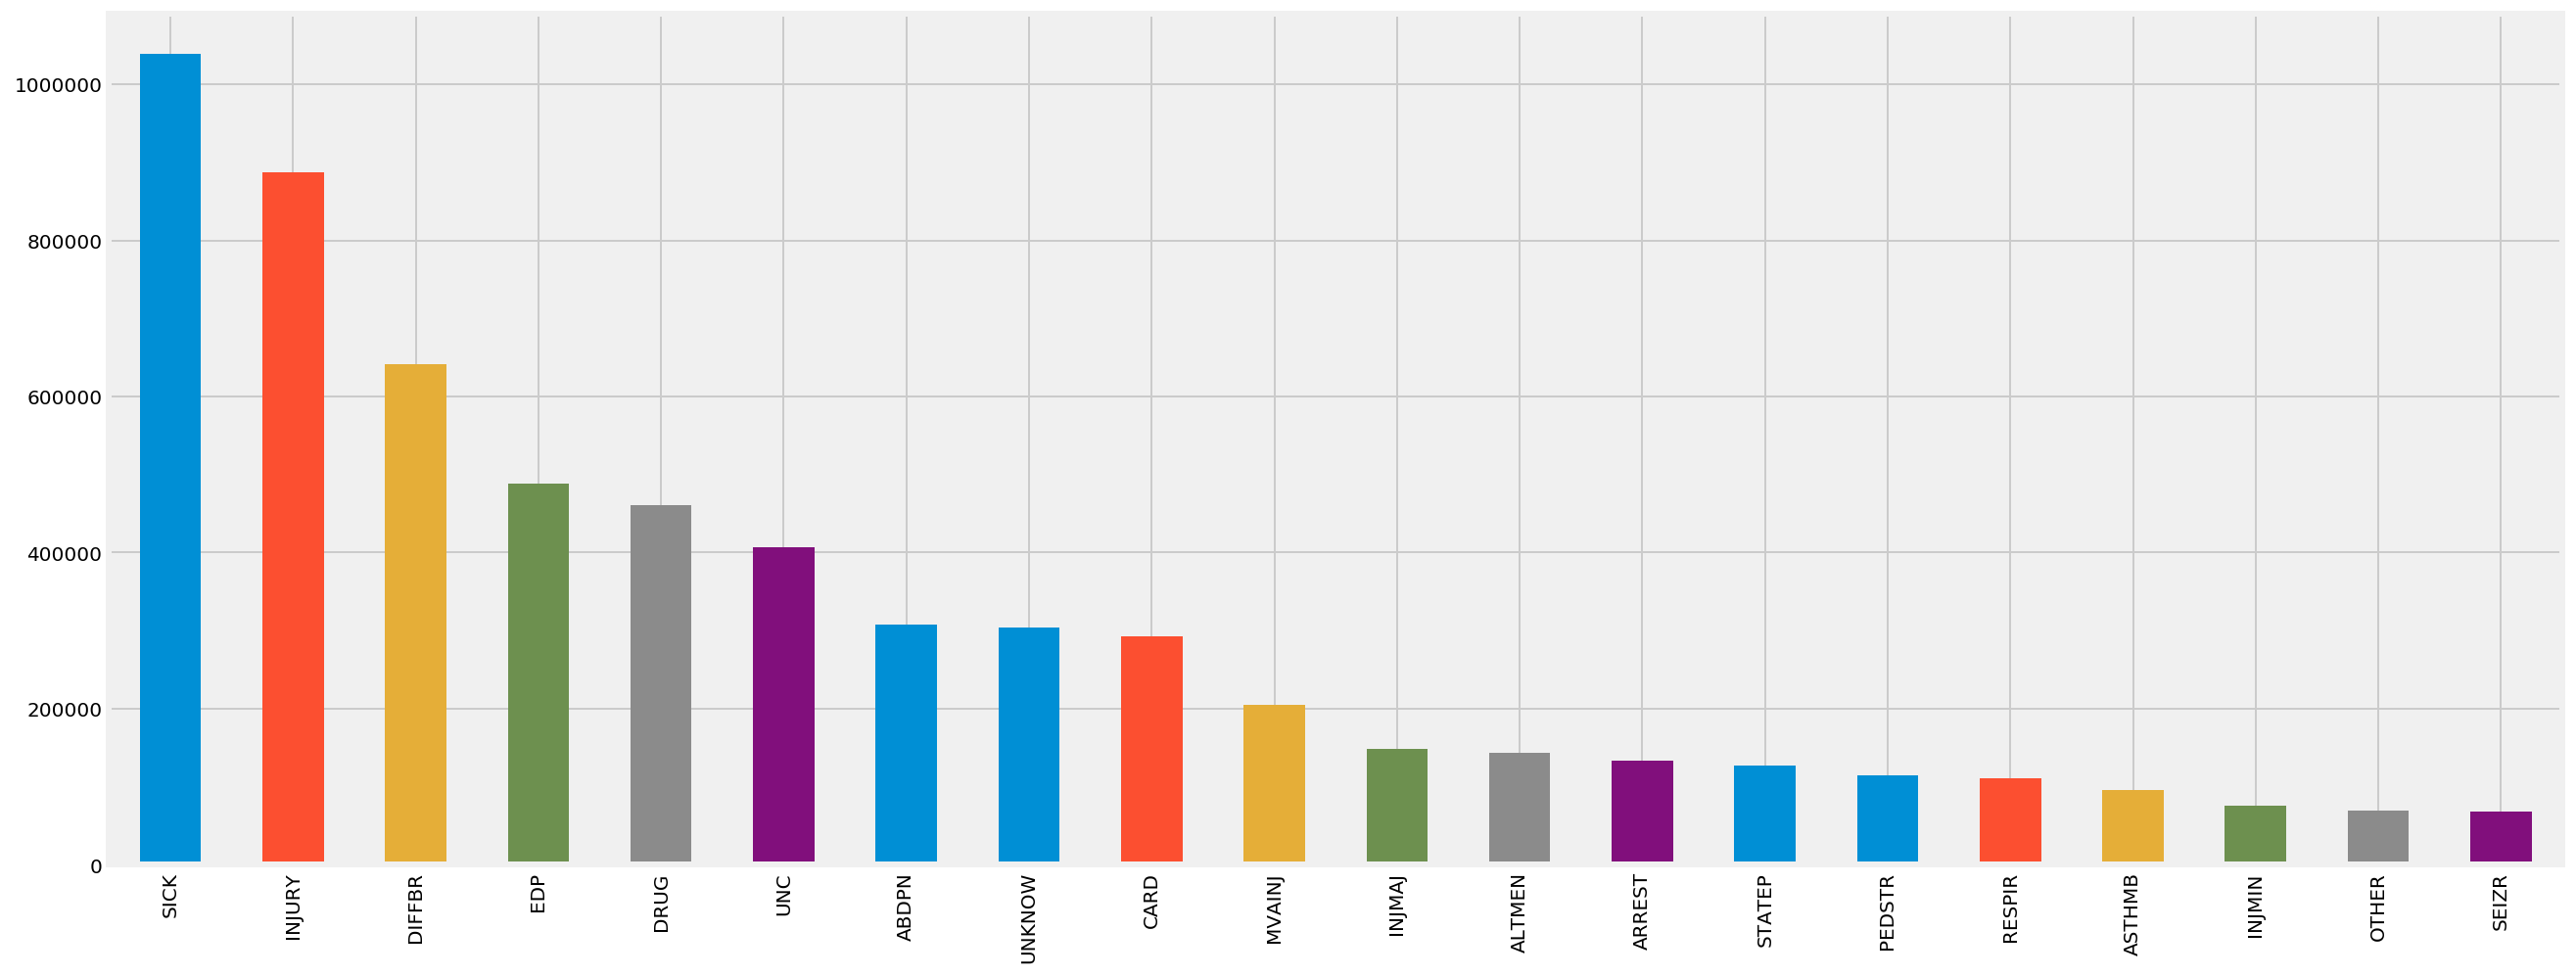

In [751]:
# Call Type analysis

call_counts = inp_data['FINAL_CALL_TYPE'].value_counts()
call_counts.head(5)
call_counts.head(20).plot.bar(figsize=(20,8))

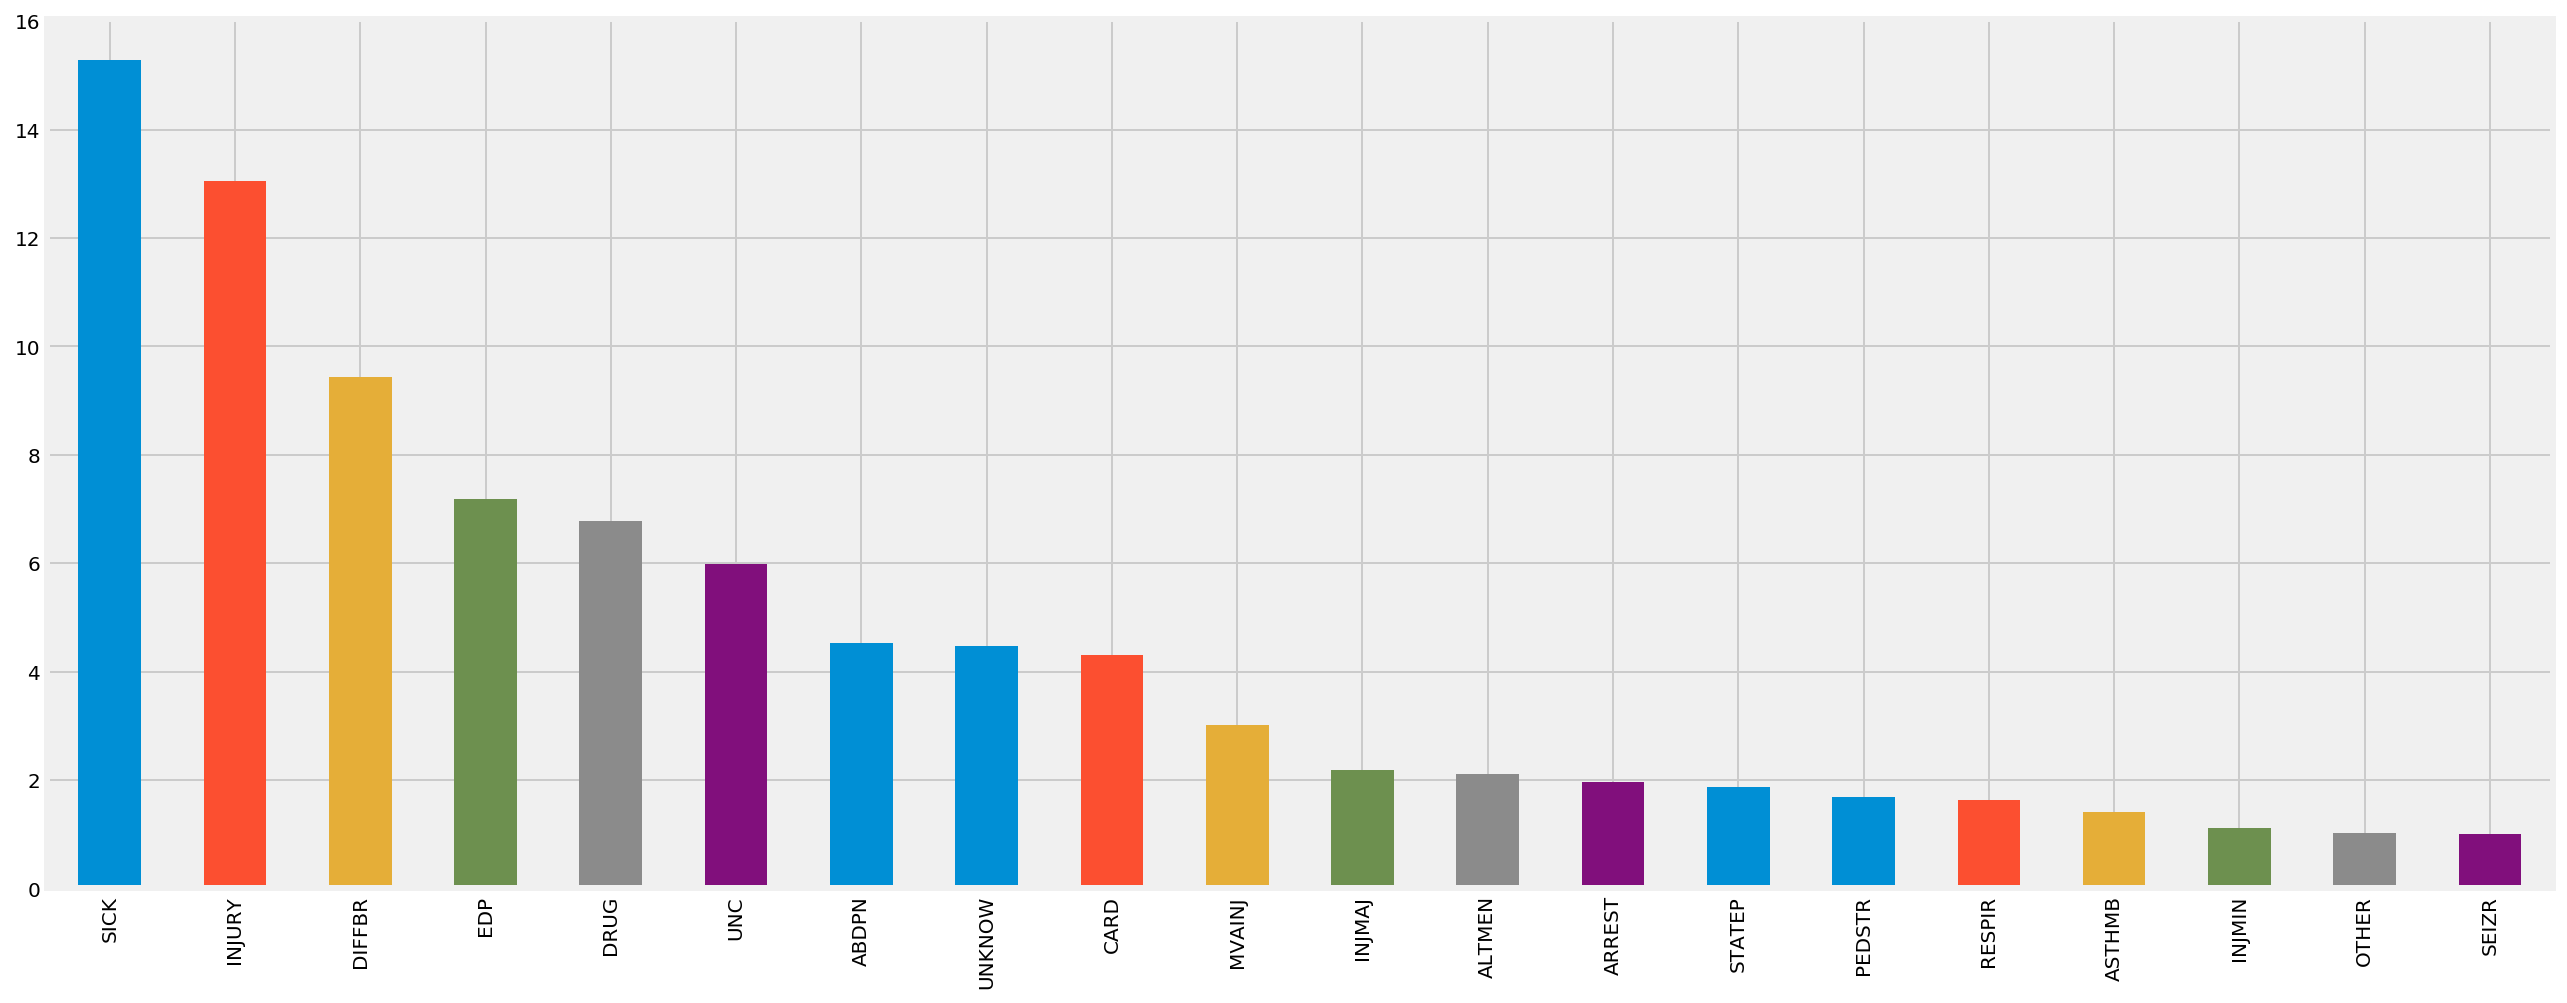

In [752]:
# Call percentages
call_pct = call_counts * 100 / call_counts.sum()
call_pct.head(5)

call_pct.head(20).plot.bar(figsize=(20,8))

In [753]:
# Analysis of travel times (Histogram, Minimum, Maximum, Mean, Median)
# Analysis of travel times by zipcode

print('Number of rows with travel time 0: ' + str(len(inp_data[inp_data['INCIDENT_TRAVEL_TM_SECONDS_QY'] == 0])))

zero_travel_time = inp_data[inp_data['INCIDENT_TRAVEL_TM_SECONDS_QY'] == 0]   # also, travel time == 1?  number = 147 
zero_travel_time.head(10)

Number of rows with travel time 0: 82808


,CAD_INCIDENT_ID,INCIDENT_DATETIME,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,INCIDENT_CLOSE_DATETIME,HELD_INDICATOR,INCIDENT_DISPOSITION_CODE,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
25,130010028,2013-01-01 00:07:31,ARREST,1,01/01/2013 12:07:57 AM,Y,26,01/01/2013 12:07:57 AM,01/01/2013 12:07:57 AM,Y,26,0,01/01/2013 12:38:34 AM,N,82.0,BROOKLYN,K7,11211.0,N,N,N,N
30,130010034,2013-01-01 00:08:41,INJURY,5,01/01/2013 12:08:41 AM,Y,0,01/01/2013 12:08:41 AM,01/01/2013 12:08:41 AM,Y,0,0,01/01/2013 12:14:51 AM,N,90.0,BRONX,B1,10454.0,N,N,N,N
45,130010051,2013-01-01 00:13:32,DRUG,4,01/01/2013 12:13:32 AM,Y,0,01/01/2013 12:13:32 AM,01/01/2013 12:13:32 AM,Y,0,0,01/01/2013 12:13:44 AM,N,90.0,MANHATTAN,M3,10018.0,N,N,N,N
60,130010069,2013-01-01 00:17:39,DRUG,4,01/01/2013 12:17:39 AM,Y,0,01/01/2013 12:17:39 AM,01/01/2013 12:17:39 AM,Y,0,0,01/01/2013 12:49:39 AM,N,93.0,MANHATTAN,M3,10036.0,N,N,N,N
73,130010082,2013-01-01 00:20:22,OTHER,6,01/01/2013 12:20:22 AM,Y,0,01/01/2013 12:20:22 AM,01/01/2013 12:20:22 AM,Y,0,0,01/01/2013 12:23:31 AM,N,90.0,BRONX,B1,10455.0,N,N,N,N
97,130010107,2013-01-01 00:25:30,SICK,6,01/01/2013 12:25:30 AM,Y,0,01/01/2013 12:25:30 AM,01/01/2013 12:25:30 AM,Y,0,0,01/01/2013 01:33:36 AM,N,82.0,MANHATTAN,M3,10019.0,N,N,N,N
136,130010151,2013-01-01 00:32:47,SICK,6,01/01/2013 05:23:21 AM,Y,17434,01/01/2013 05:23:21 AM,01/01/2013 05:23:21 AM,Y,17434,0,01/01/2013 05:23:34 AM,Y,90.0,MANHATTAN,M2,10003.0,N,N,N,N
144,130010159,2013-01-01 00:34:16,SICK,6,01/01/2013 12:36:11 AM,Y,115,01/01/2013 12:36:11 AM,01/01/2013 12:36:11 AM,Y,115,0,01/01/2013 01:34:01 AM,Y,82.0,MANHATTAN,M3,10036.0,N,N,N,N
154,130010169,2013-01-01 00:35:23,DRUG,4,01/01/2013 12:35:23 AM,Y,0,01/01/2013 12:35:23 AM,01/01/2013 12:35:23 AM,Y,0,0,01/01/2013 12:49:19 AM,N,93.0,MANHATTAN,M3,10036.0,N,N,N,N
175,130010190,2013-01-01 00:38:12,UNC,2,01/01/2013 12:38:18 AM,Y,6,01/01/2013 12:38:18 AM,01/01/2013 12:38:18 AM,Y,6,0,01/01/2013 12:57:34 AM,N,87.0,MANHATTAN,M3,10036.0,N,N,N,N


In [754]:
# Filter all rows with travel time 0 and the ones having travel time > 2 hours

filtered_inp = inp_data[(inp_data['INCIDENT_TRAVEL_TM_SECONDS_QY'] != 0) & (inp_data['INCIDENT_TRAVEL_TM_SECONDS_QY'] < 7200)]

print('Number of filtered entries: ' + str(len(inp_data) - len(filtered_inp)))

travel_times = filtered_inp['INCIDENT_TRAVEL_TM_SECONDS_QY']

print('Minimum travel time: ' + str(travel_times.min()))
print('Maximum travel time: ' + str(travel_times.max()))


Number of filtered entries: 83328
Minimum travel time: 1
Maximum travel time: 7193


In [755]:
traveltime_counts = travel_times.value_counts()
traveltime_counts.tail(10)

5668    1
6585    1
6584    1
6595    1
6594    1
6593    1
6597    1
6602    1
4796    1
4098    1
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, dtype: int64

In [756]:
# Number of cases where travel time was greater than 30 minutes

# There are quite a few rows with values greater than 30 mins or 1 hour. Are these actual values or could be mistakes
# Should such rows be pruned? 


print('Number of rows with travel time greater than 30 minutes: ' + str(travel_times.where(travel_times>1800).count()))
print('Number of rows with travel time greater than 45 minutes: ' + str(travel_times.where(travel_times>2700).count()))
print('Number of rows with travel time greater than 60 minutes: ' + str(travel_times.where(travel_times>3600).count()))


Number of rows with travel time greater than 30 minutes: 60220
Number of rows with travel time greater than 45 minutes: 15921
Number of rows with travel time greater than 60 minutes: 5740


In [757]:
zip_groups = filtered_inp.groupby('ZIPCODE')

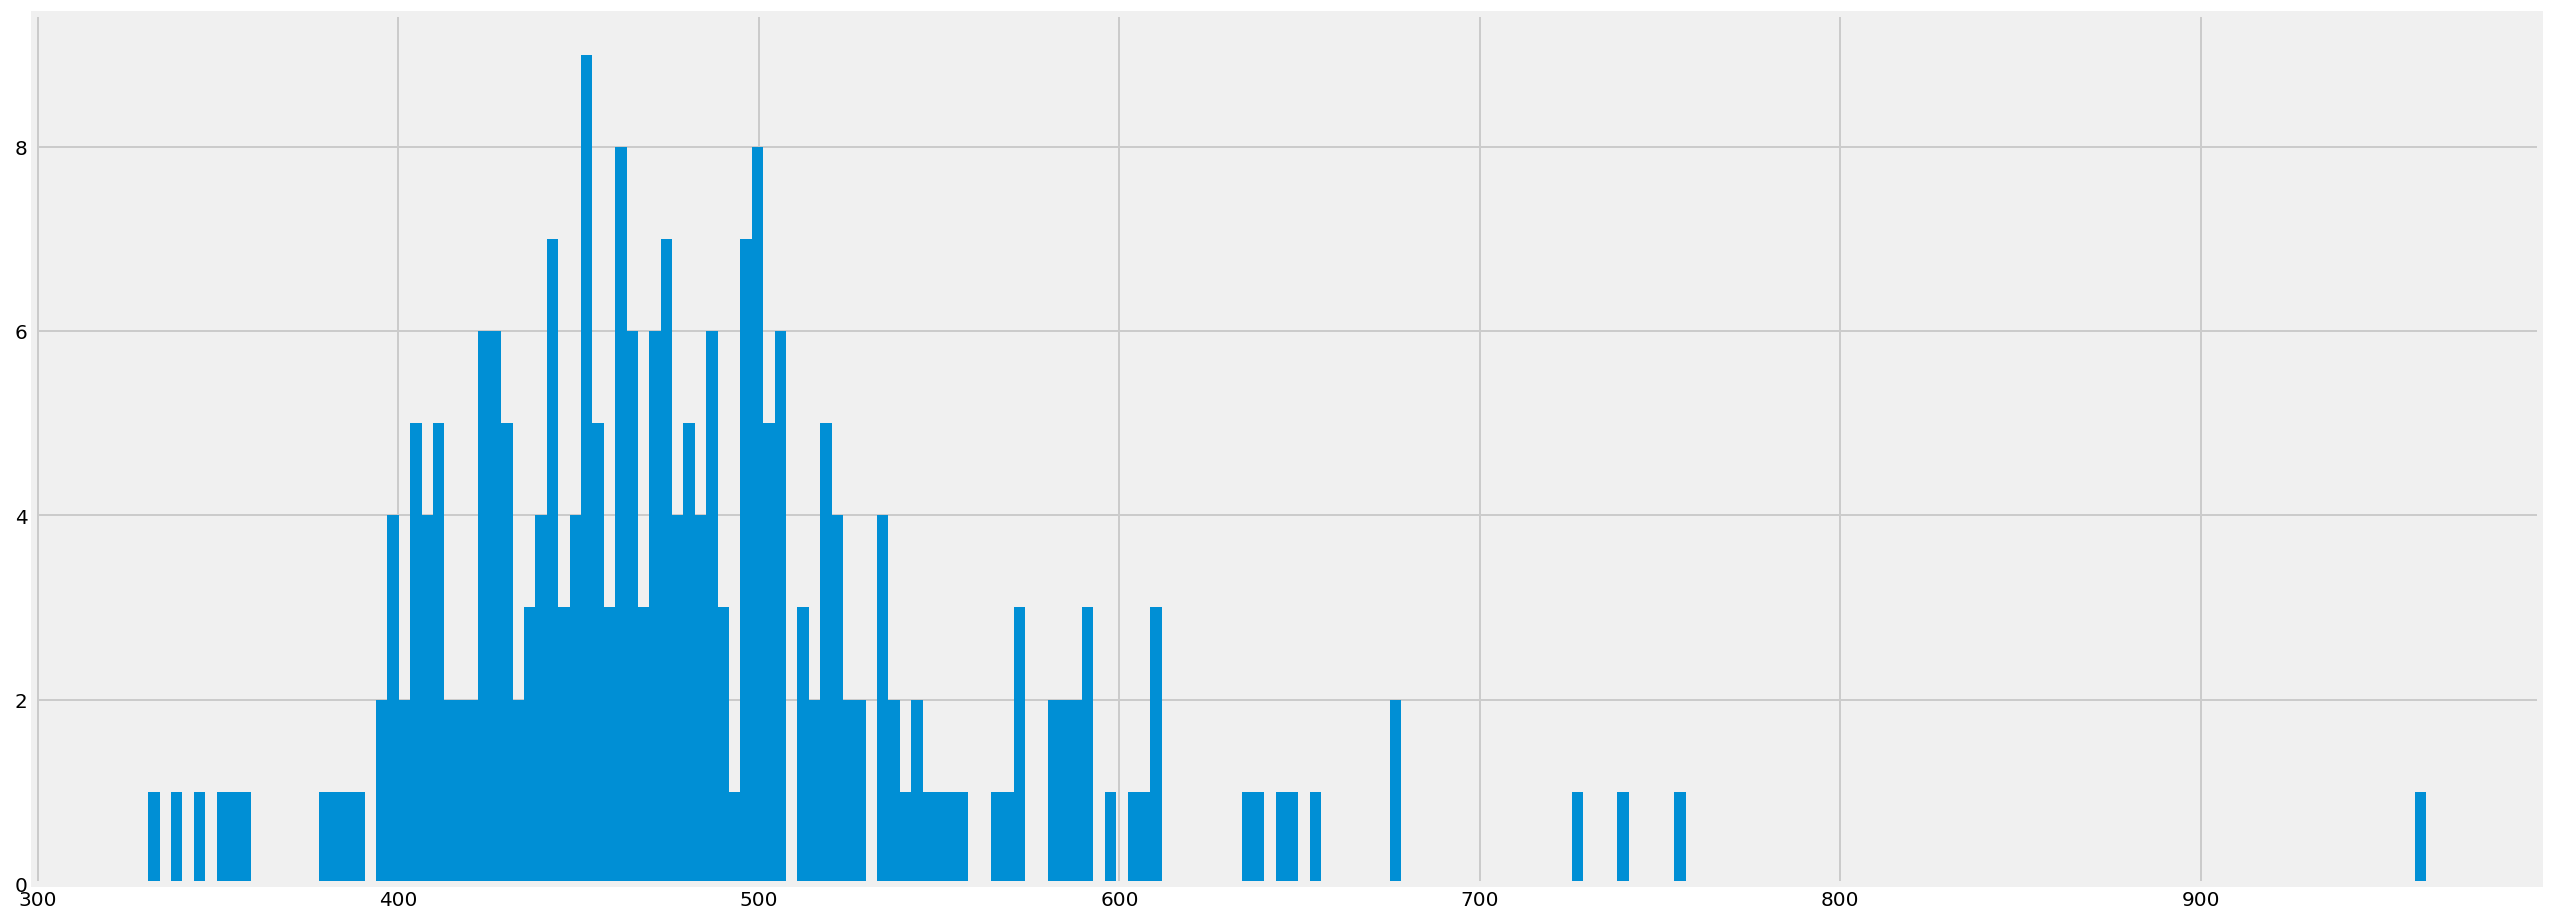

In [758]:
# Mean travel time by zipcode

# Mean could be severely affected by outliers 
mean_travel_time_byzip = zip_groups['INCIDENT_TRAVEL_TM_SECONDS_QY'].mean()
mean_travel_time_byzip.hist(bins=200, figsize=(20,8))

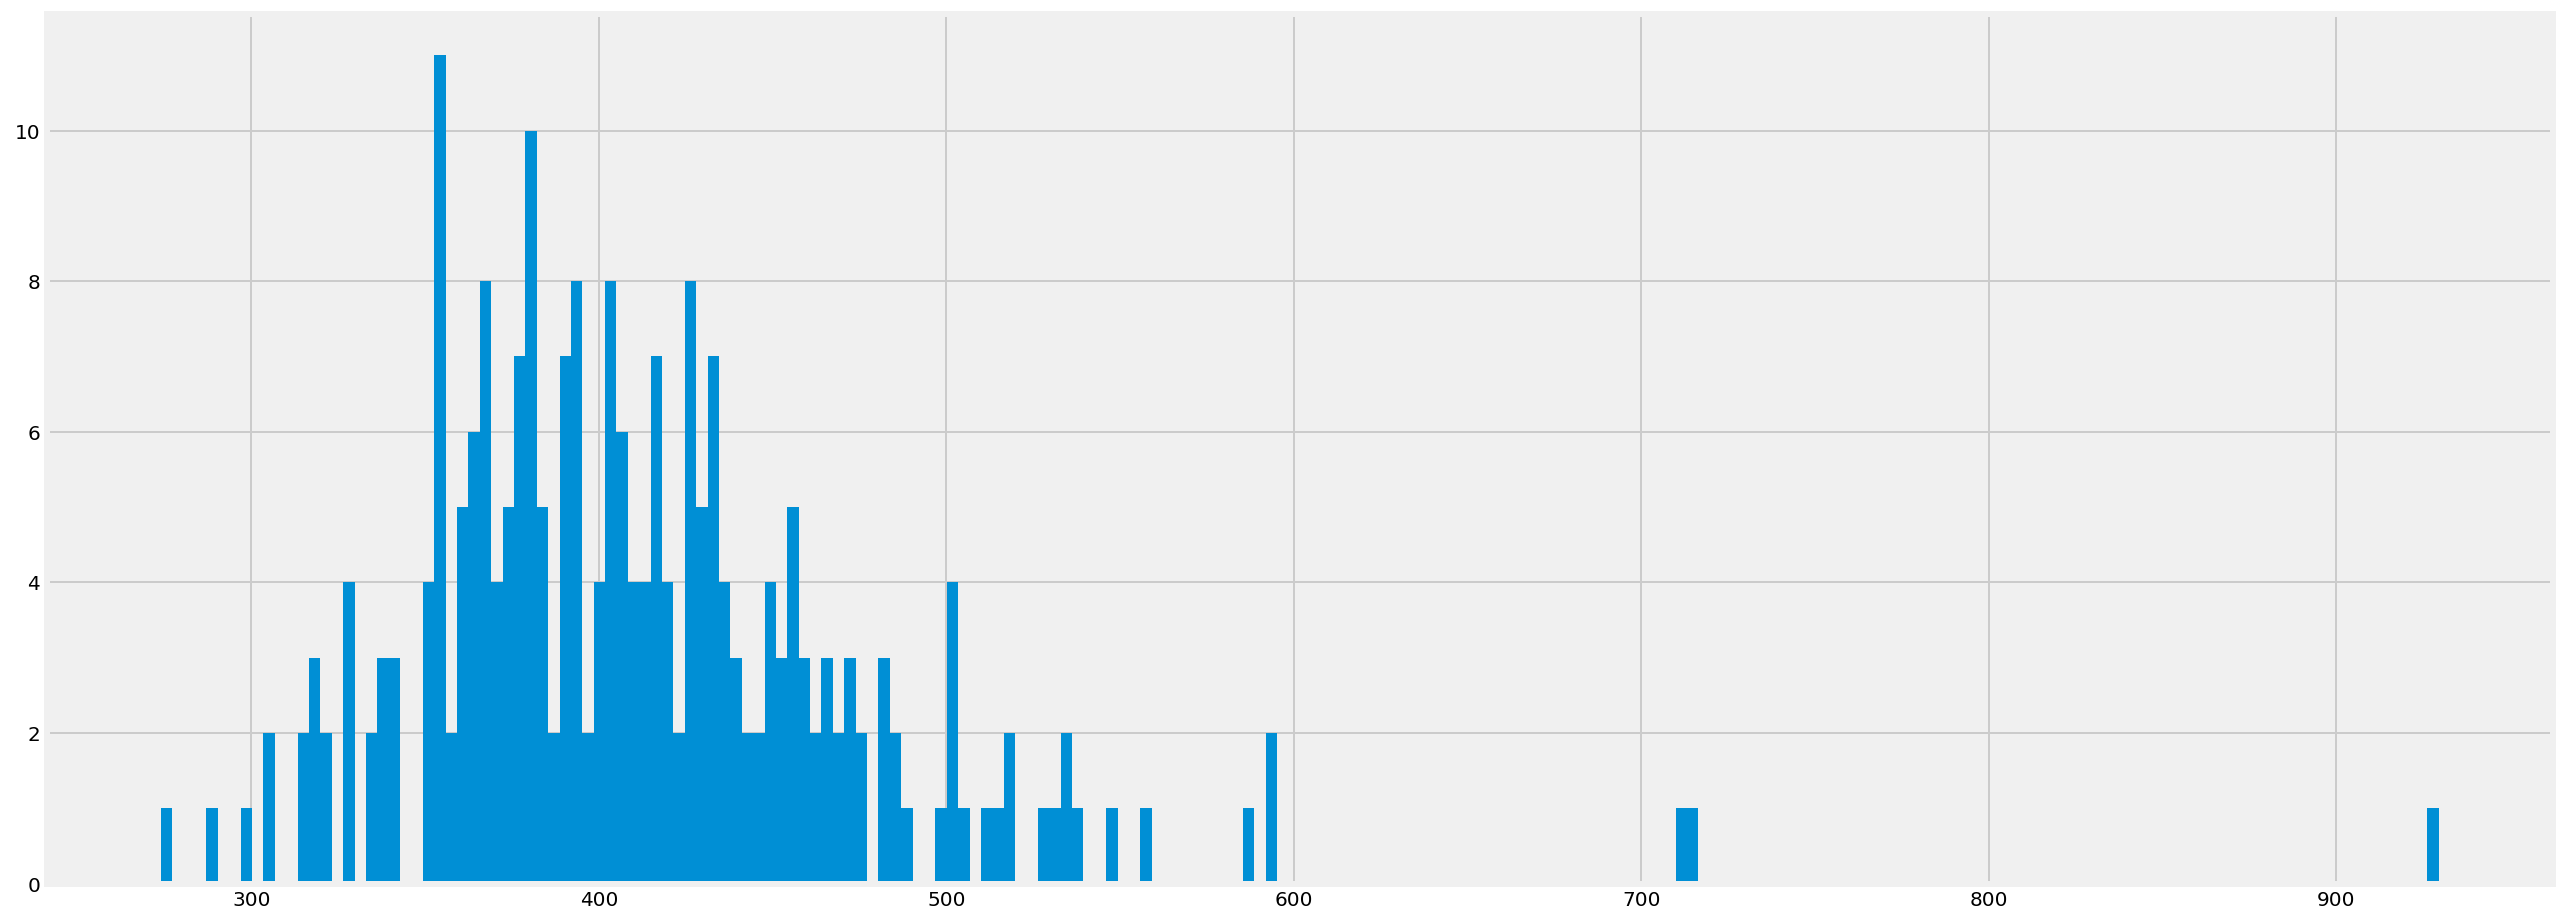

In [759]:
# Median travel time by zipcode
median_travel_time_byzip = zip_groups['INCIDENT_TRAVEL_TM_SECONDS_QY'].median()
median_travel_time_byzip.hist(bins=200, figsize=(20,8))

In [760]:
def dayofweekanalysis(dataset):
    dataset.loc[:,'DAY_OF_WEEK'] = dataset['INCIDENT_DATETIME'].apply(lambda x: x.isoweekday())
    cases_bydayofweek = dataset['DAY_OF_WEEK'].value_counts()
    cases_bydayofweek.plot.bar()
    print(cases_bydayofweek.head(7))    

In [761]:
from datetime import time

"""
00.00 - 05.59 : Night      1
6.00 - 11.59 : Morning     2
12.00 - 17.59: Afternoon   3
18.00 - 23.59: Evening     4

"""
def timeofday(inp):
    inptime = inp.time()
    t1 = time(hour=0, minute=0, second=0)
    t2 = time(hour=6, minute=0, second=0)
    t3 = time(hour=12, minute=0, second=0)
    t4 = time(hour=18, minute=0, second=0)

    if inptime >= t1 and inptime < t2:
        return 1
    elif inptime >= t2 and inptime < t3:
        return 2
    elif inptime >= t3 and inptime < t4:
        return 3
    else:
        return 4
    

def timeofdayanalysis(dataset):
    dataset['TIME_OF_DAY'] = dataset['INCIDENT_DATETIME'].apply(timeofday)
    cases_bytimeofday = dataset['TIME_OF_DAY'].value_counts()
    cases_bytimeofday.plot.bar()
    print(cases_bytimeofday.head(4))

In [762]:
def monthanalysis(dataset):
    dataset['MONTH'] = dataset['INCIDENT_DATETIME'].apply(lambda x: x.date().month)
    cases_bymonth = dataset['MONTH'].value_counts()
    cases_bymonth.plot.bar()
    print(cases_bymonth.head(12))

5    997918
1    990811
3    979349
2    977543
4    976684
6    951573
7    924143
Name: DAY_OF_WEEK, dtype: int64


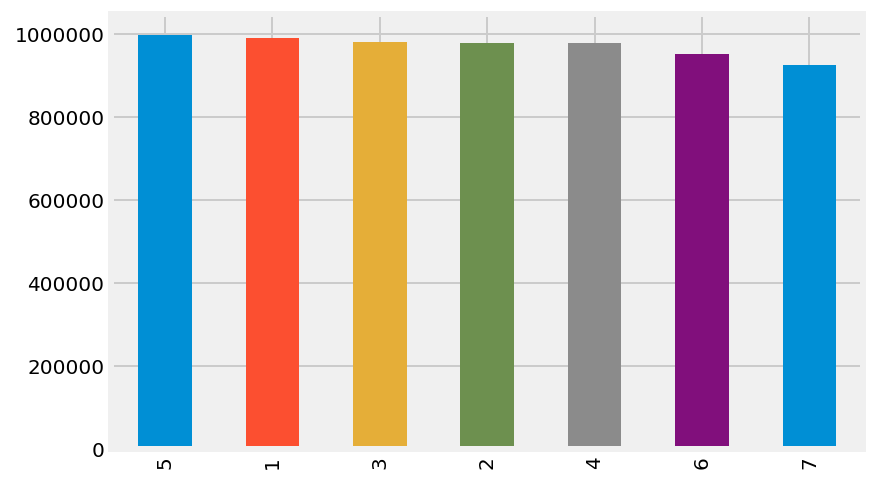

In [763]:
dayofweekanalysis(inp_data)

3    2147194
4    1924482
2    1626926
1    1099419
Name: TIME_OF_DAY, dtype: int64


'\n00.00 - 05.59 : Night      1\n6.00 - 11.59 : Morning     2\n12.00 - 17.59: Afternoon   3\n18.00 - 23.59: Evening     4\n\n'

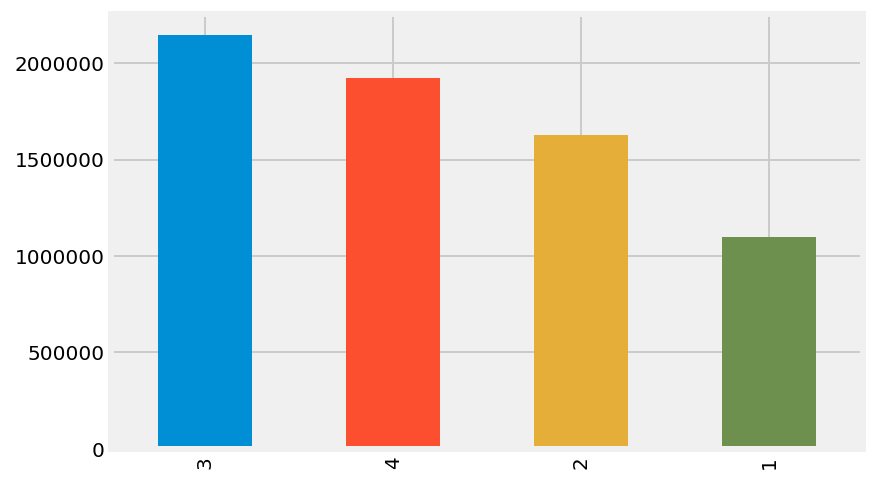

In [764]:
timeofdayanalysis(inp_data)

"""
00.00 - 05.59 : Night      1
6.00 - 11.59 : Morning     2
12.00 - 17.59: Afternoon   3
18.00 - 23.59: Evening     4

"""


7     599425
5     591723
8     588237
6     584802
10    576896
12    573256
9     568217
1     566410
3     558104
4     549073
11    538609
2     503269
Name: MONTH, dtype: int64


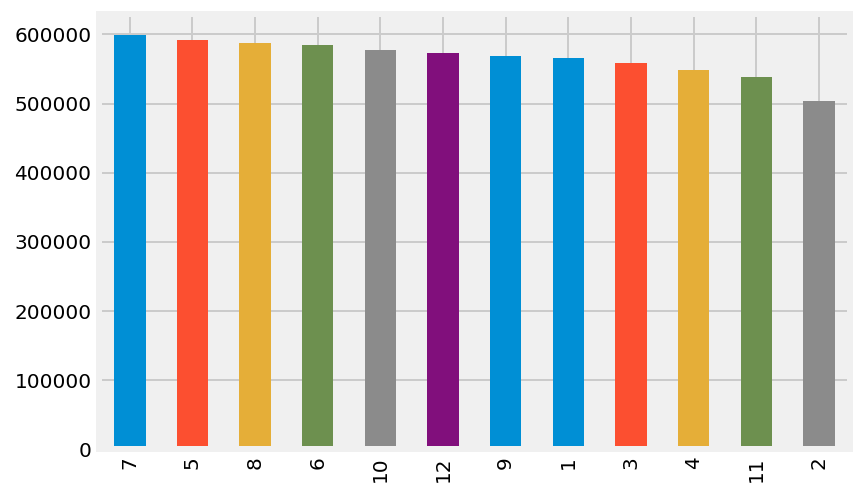

In [765]:
monthanalysis(inp_data)

In [766]:
# bronx_data contains the records corresponding to the zipcode with the highest number of calls
bronx_data = inp_data[inp_data['ZIPCODE'] == 10456]
print(len(bronx_data))

131287


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1    19654
3    19138
2    19062
5    18783
4    18777
6    17986
7    17887
Name: DAY_OF_WEEK, dtype: int64


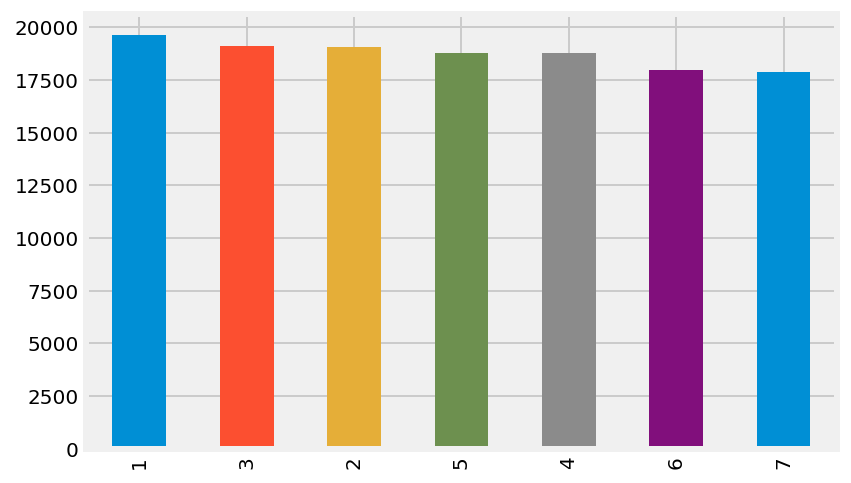

In [767]:
dayofweekanalysis(bronx_data)

3    39299
4    37641
2    32349
1    21998
Name: TIME_OF_DAY, dtype: int64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'\n00.00 - 05.59 : Night      1\n6.00 - 11.59 : Morning     2\n12.00 - 17.59: Afternoon   3\n18.00 - 23.59: Evening     4\n\n'

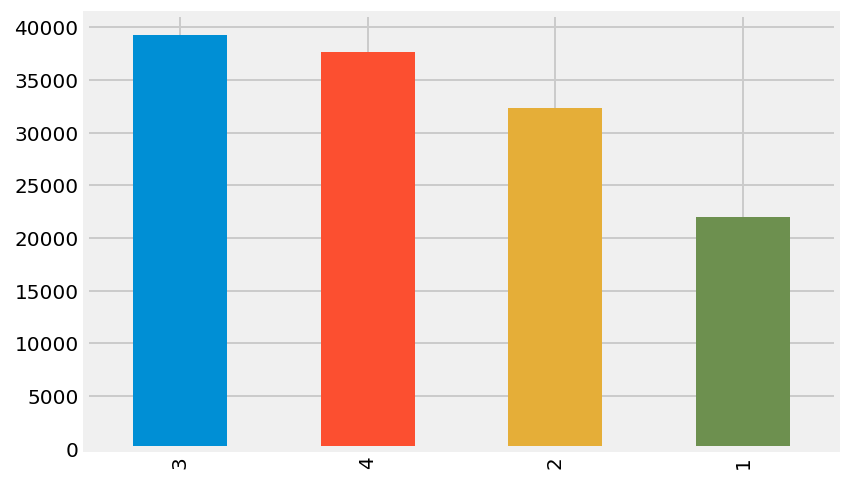

In [768]:
timeofdayanalysis(bronx_data)

"""
00.00 - 05.59 : Night      1
6.00 - 11.59 : Morning     2
12.00 - 17.59: Afternoon   3
18.00 - 23.59: Evening     4

"""

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1     11518
8     11268
3     11248
10    11224
5     11211
7     11170
6     11071
12    10963
4     10673
9     10671
11    10351
2      9919
Name: MONTH, dtype: int64


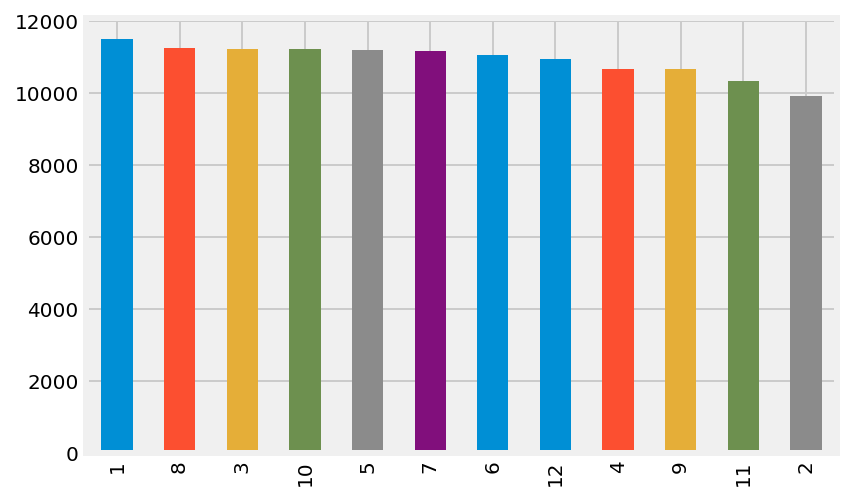

In [769]:
monthanalysis(bronx_data)

In [770]:
# Zip1 corresponds to a zipcode around 70th percentile 
zip1 = zipcode_counts.index[70]
zip1cases = zipcode_counts.iloc[70]
print(zip1)
print(zip1cases)

zip1_data = inp_data[inp_data['ZIPCODE'] == zip1]
print(len(zip1_data))

11230.0
37390
37390


5    5580
1    5572
2    5466
3    5420
4    5398
7    5181
6    4773
Name: DAY_OF_WEEK, dtype: int64


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


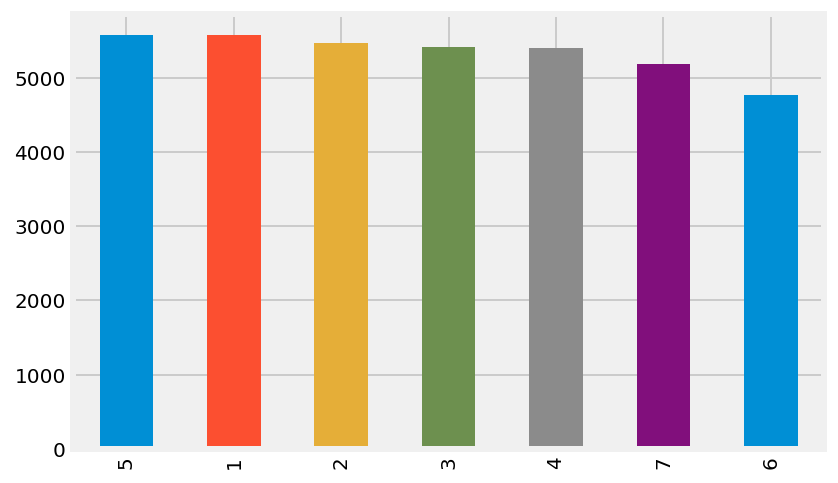

In [771]:
dayofweekanalysis(zip1_data)

3    11750
4    10877
2     8906
1     5857
Name: TIME_OF_DAY, dtype: int64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


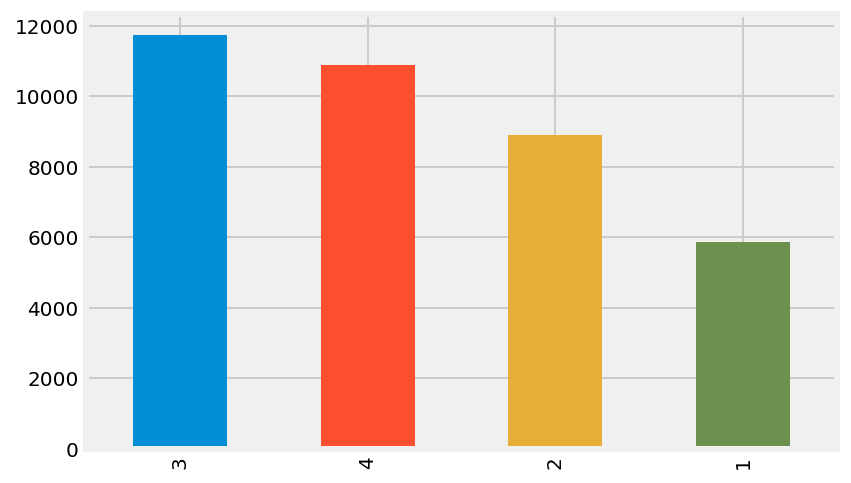

In [772]:
timeofdayanalysis(zip1_data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


10    3260
5     3233
1     3186
12    3181
7     3176
3     3151
6     3111
8     3098
9     3066
4     3029
11    2971
2     2928
Name: MONTH, dtype: int64


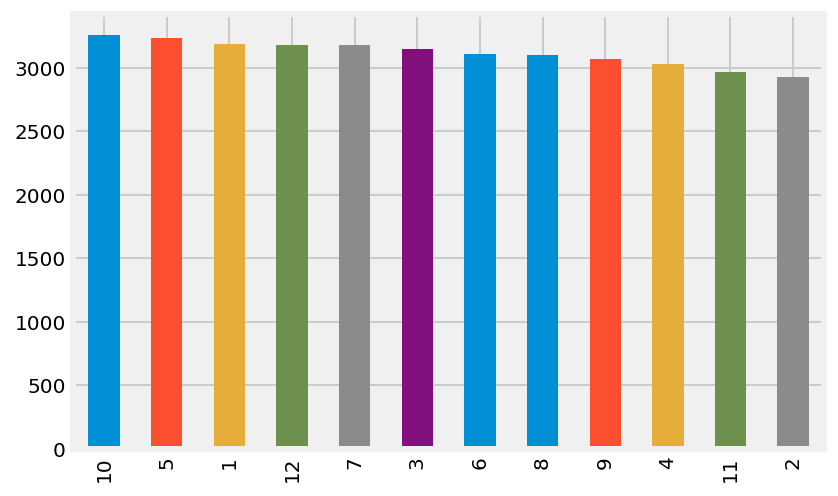

In [773]:
monthanalysis(zip1_data)

In [774]:
# day vs night (8am - 8pm ),  weekday vs weekend

# check out literature for time based demand estimation 

# look at disposition codes: filter out Duplicate calls

# time series analysis (each zipcode )

# formulate optimization formula


In [775]:
zipcode_counts.to_csv("ZipcodeCountsUpdated.csv", encoding='utf-8')

In [776]:
ailmentType = 'DRUG'
ailmentCount = len(inp_data[inp_data['FINAL_CALL_TYPE'] == ailmentType])
print("Number of people with " + ailmentType + " is: " + str(ailmentCount) )

Number of people with DRUG is: 461315


In [46]:
# For charts makes them hd definition for retina display
%config  InlineBackend.figure_format = 'retina'
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [47]:
dataloc_ml =  '../data/Daily_Average_Temperature_and_Call_Count.csv'
usecols_ml = ['date','month','day','year','Call_Count','Temp_Avg']
inp_data_ml = pd.read_csv(dataloc_ml, usecols=usecols_ml, parse_dates=[0], index_col=[0], thousands = ',') # dtype={'ZIPCODE': int, 'POLICEPRECINCT':int, 'CITYCOUNCILDISTRICT':int, 'COMMUNITYDISTRICT': int, 'COMMUNITYSCHOOLDISTRICT': int, 'CONGRESSIONALDISTRICT':int}

# sort by date
inp_data_ml.sort_index(inplace=True)

print(inp_data_ml.shape)
inp_data_ml.info()

(1826, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 5 columns):
month         1826 non-null object
day           1826 non-null int64
year          1826 non-null int64
Call_Count    1826 non-null int64
Temp_Avg      1826 non-null int64
dtypes: int64(4), object(1)
memory usage: 85.6+ KB


In [48]:
# Historical Average. By all Jan-1, Jan-2...
# Unfinished
# [WIP] = Work in progress not used in paper
month_and_day = inp_data_ml.groupby([inp_data_ml.index.month,inp_data_ml.index.day, ]).mean()
print("Jan-1 average calls: ", month_and_day.iloc[0])
print(month_and_day.shape)

# Got the average per day but its a multiindex and can't put it in df
#month_and_day.head(1).apply(lambda x: print("LAMBDA: ", x.index[0][0]))
#print("Callcount: ", month_and_day.head(1).Call_Count[0][1])
#inp_data_ml[datetime(2013,1,1):datetime(i,12,31)]

# Put 3846 in all the columns
inp_data_ml['average'] = inp_data_ml['day'].apply(lambda x: 3846)
print("average column added ") #, inp_data_ml.index[:20], inp_data_ml['average'].head(3))


Jan-1 average calls:  day              1.0
year          2015.0
Call_Count    4738.4
Temp_Avg        35.4
Name: (1, 1), dtype: float64
(366, 4)
average column added 


In [49]:
#type(inp_data_ml.index[2])
#inp_data_ml.index[2]
inp_data_ml.index[:20]


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10', '2013-01-11', '2013-01-12',
               '2013-01-13', '2013-01-14', '2013-01-15', '2013-01-16',
               '2013-01-17', '2013-01-18', '2013-01-19', '2013-01-20'],
              dtype='datetime64[ns]', name='date', freq=None)

In [50]:

# Convert the columns to appropriate datatypes (not needed) thank you parse_dates=[0,1,2] setting!
#inp_data_ml['Call_Count'] = inp_data_ml['Call_Count'].fillna(0.0).astype(int,copy=False)
#inp_data_ml['day'] = pd.to_datetime(inp_data_ml[['day','month','year']],format='%d/%MMMM/%Y %I:%M:%S %p')
# 2013-01-01 00:00:04

In [51]:
pd.set_option('display.max_columns', None)
inp_data_ml.head(10)

,month,day,year,Call_Count,Temp_Avg,average
date,,,,,,
2013-01-01,January,1,2013,4897,33,3846
2013-01-02,January,2,2013,3752,28,3846
2013-01-03,January,3,2013,3993,28,3846
2013-01-04,January,4,2013,3945,34,3846
2013-01-05,January,5,2013,3420,37,3846
2013-01-06,January,6,2013,3442,40,3846
2013-01-07,January,7,2013,4006,41,3846
2013-01-08,January,8,2013,4035,42,3846
2013-01-09,January,9,2013,3805,44,3846


In [52]:
print("Size of dataset: " + str(len(inp_data_ml)))
print(inp_data_ml.iloc[0]) # iloc gives full row info
print("Type of index: " + str(type(inp_data_ml.index)))

Size of dataset: 1826
month         January
day                 1
year             2013
Call_Count       4897
Temp_Avg           33
average          3846
Name: 2013-01-01 00:00:00, dtype: object
Type of index: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [53]:
print('First day is ' + str(inp_data_ml.index[0]))
print('Second day is ' + str(inp_data_ml.index[1]))
print('Last day is ' + str(inp_data_ml.index[-1]))
inp_data_ml.describe()

First day is 2013-01-01 00:00:00
Second day is 2013-01-02 00:00:00
Last day is 2017-12-31 00:00:00


,day,year,Call_Count,Temp_Avg,average
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.0
mean,15.736035,2015.000548,3846.234940,56.334064,3846.0
std,8.808986,1.414407,299.946523,17.732259,0.0
min,1.000000,2013.000000,2813.000000,7.000000,3846.0
25%,8.000000,2014.000000,3625.000000,43.000000,3846.0
50%,16.000000,2015.000000,3860.000000,58.000000,3846.0
75%,24.000000,2016.000000,4053.000000,72.000000,3846.0
max,31.000000,2017.000000,4975.000000,90.000000,3846.0


In [54]:
#had to add int dateRow index for graphing on scatter plot 
inp_data_ml['dateRow'] = inp_data_ml.index.year + (inp_data_ml.index.month / (12.*2)) + (inp_data_ml.index.day / (30.*2)) 

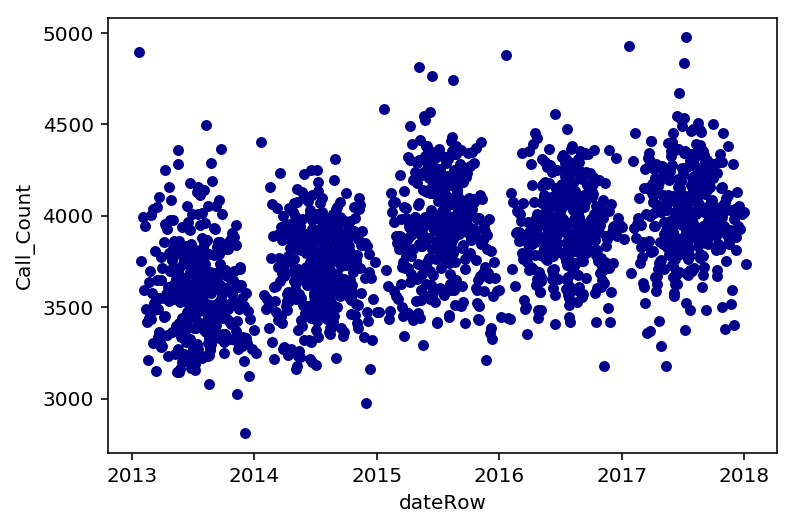

In [55]:
#pd.show_versions()# -- I have pandas v 0.22.0 installed 
ax1 = inp_data_ml.plot.scatter(x='dateRow',
                               y='Call_Count',
                               c='DarkBlue') #remove
                               #c='species',  
                               #colormap='viridis') #might be a v 0.24 thing only

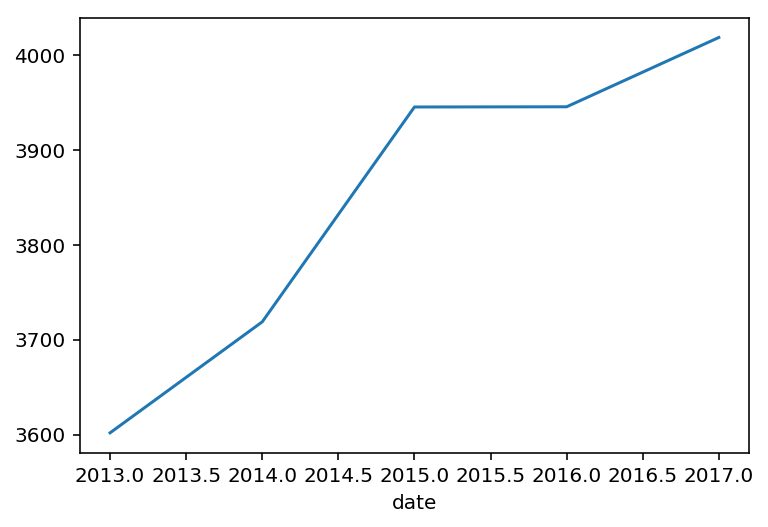

In [56]:
#for column in inp_data_ml.columns:

#def byyear(dataset):
#start = datetime(2013,1,1)
#end = datetime(2013,12,31)
#date_range_index = pd.date_range(start,end)
#ts = pd.Series(np.random.randn(len(date_range_index)), index=date_range_index)
#ts.index
#print(str(len(inp_data_ml[date_range_index])))

#Getting average 
# 1)

#[2013,2017]
#print("date     average")
#for i in range(2013,2018):
#    print(str(i)+ ": "  + str(inp_data_ml[datetime(i,1,1):datetime(i,12,31)]['Call_Count'].mean())) # works!

# 2)
average_year = inp_data_ml.groupby([inp_data_ml.index.year])['Call_Count'].mean()
#year_and_month = inp_data_ml.groupby([inp_data_ml.index.year, inp_data_ml.index.month])['Call_Count'].mean()
#year_and_month.index[0][1]) + "-" + str(year_and_month.index[0][0])
#year_and_month['year_month'] = year_and_month.index
#year_and_month['year_month'] = year_and_month.index[][1]) + "-" + str(year_and_month.index[][0])
#year_and_month['month_year'] = year_and_month[0]
#print(year_and_month)

# multiple lines lot:  df = df.cumsum();   plt.figure();  df.plot();
ax2 = average_year.plot()


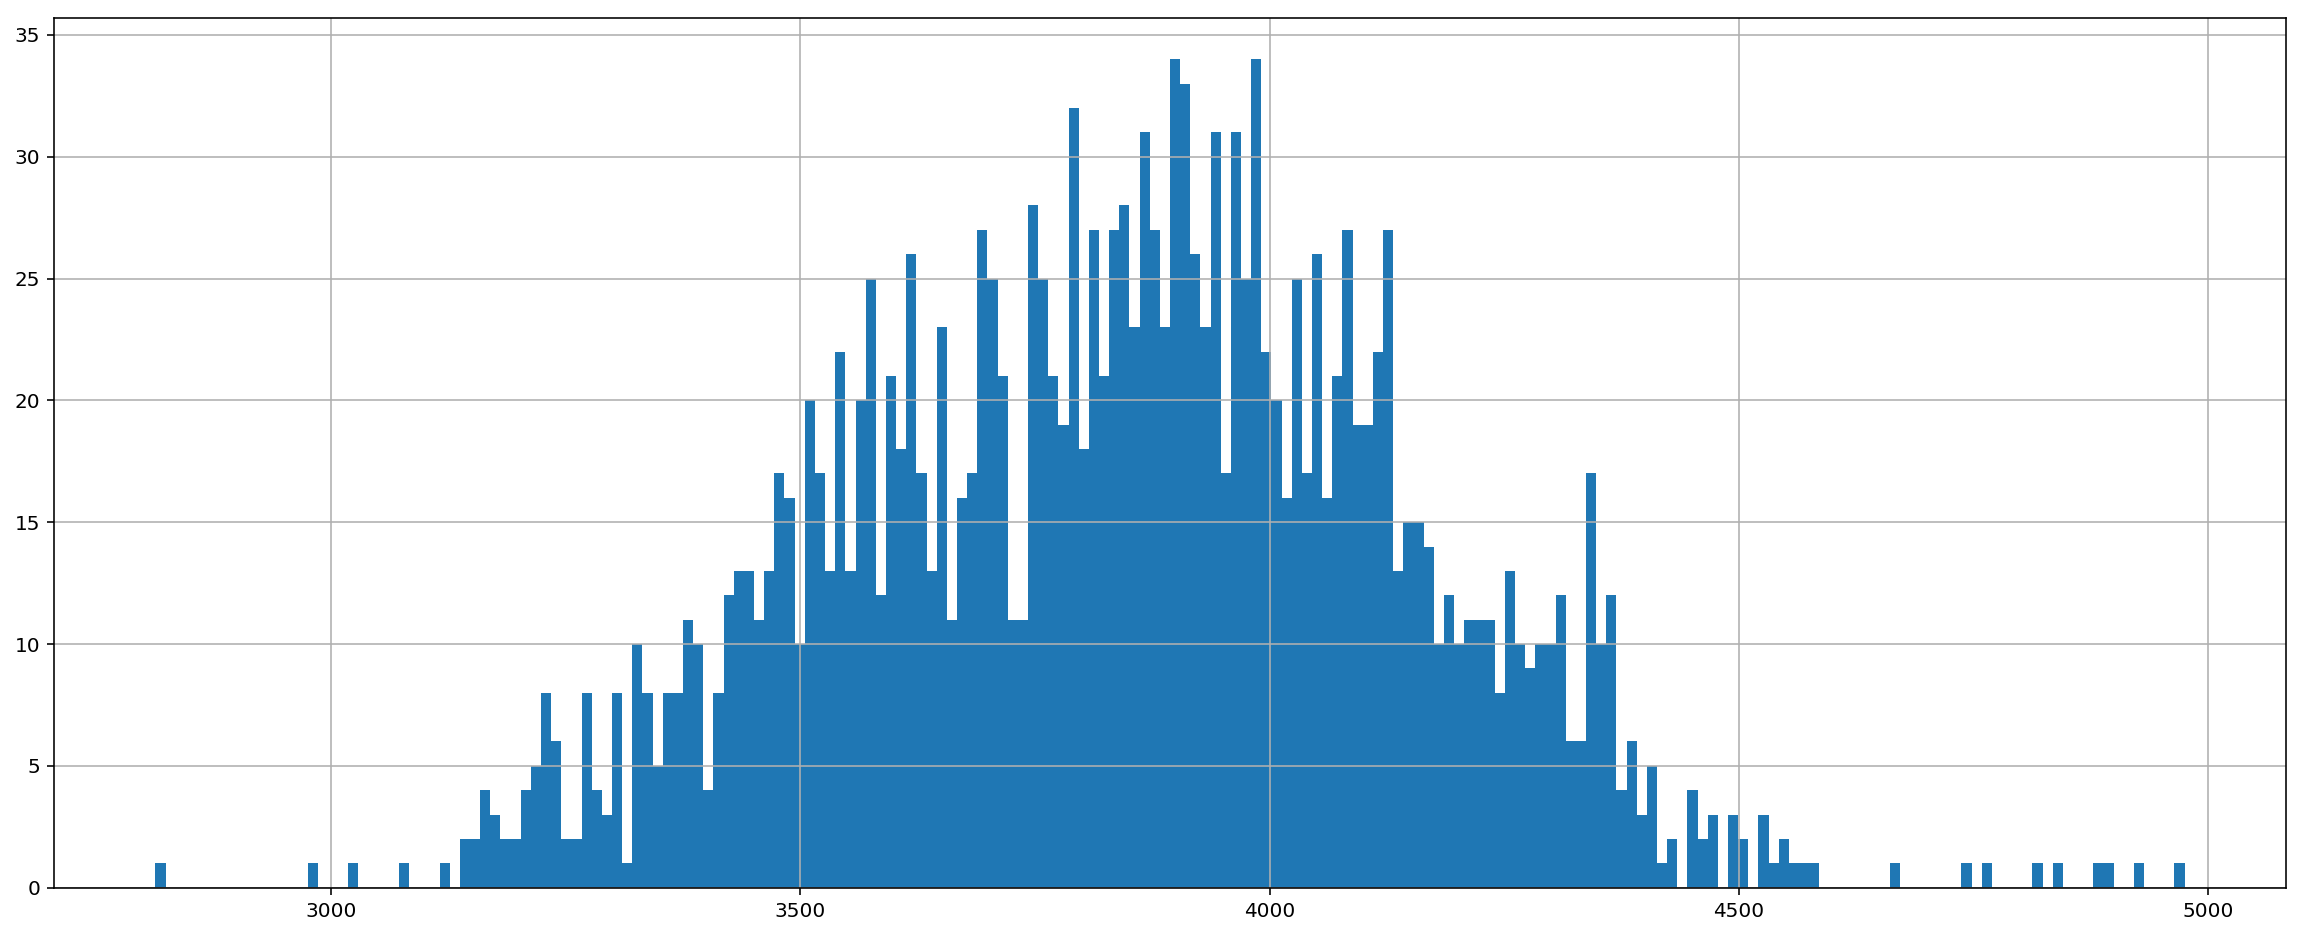

In [57]:
inp_data_ml['Call_Count'].hist(bins=200, figsize=(20,8))
#TODO: look into np.std()

In [58]:
# helper functions
def getCalls(year):
    return inp_data_ml[datetime(year,1,1):datetime(year,12,31)]['Call_Count']

# add new column month_int
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

# want to convert month 'January' => 1   to int
inp_data_ml['month_int'] = inp_data_ml['month'].apply(lambda x: month_map[x])   #.map(month_map)

# Remove that january:object column 
# Remove the Call_Count 
# only need to do it once
inp_data_ml = inp_data_ml.drop(columns=['month'])

labels = np.array(inp_data_ml['Call_Count'])                                          # Y

inp_data_ml = inp_data_ml.drop(columns=['Call_Count'])

feature_list = list(inp_data_ml.columns) #['dateRow']  #.index) # list(inp_data_ml.columns) # X

inp_data_ml.head(2)

,day,year,Temp_Avg,average,dateRow,month_int
date,,,,,,
2013-01-01,1,2013,33,3846,2013.058333,1
2013-01-02,2,2013,28,3846,2013.075000,1


In [59]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

random_state_hd = 3846 #3846 #42

#target=label=value want to predict  - Y
#features=columns the model uses to make a prediction
#labels = np.array(inp_data_ml['Call_Count'])                                          # Y
    #moved to helper funnction above

# Remove the labels from the features
#inp_data_ml = inp_data_ml.drop(columns=['Call_Count'])



# Saving feature names for later use - X
#feature_list = list(inp_data_ml.columns) #['dateRow']  #.index) # list(inp_data_ml.columns) # X
#moved up

# Convert to numpy array
features = np.array(inp_data_ml)


train_features, test_features, train_labels, test_labels = train_test_split(
features, labels, test_size = 0.25, random_state = random_state_hd)


In [60]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = random_state_hd)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=3846, verbose=0, warm_start=False)

In [61]:
print("training features shape: X ", train_features.shape)
print("training labels shape: Y ", train_labels.shape)
print("testing features shape: X ", test_features.shape )
print("testing labels shape: Y ", test_labels.shape)
print('evaluating features: ', feature_list )

training features shape: X  (1369, 6)
training labels shape: Y  (1369,)
testing features shape: X  (457, 6)
testing labels shape: Y  (457,)
evaluating features:  ['day', 'year', 'Temp_Avg', 'average', 'dateRow', 'month_int']


In [62]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')] #feature_list.index('average')]
    # somehow gets just all average values (3846, 3846... etc.)
    # feature_list.index('average') = 4
    # test_features is some fractional val with 0.2~? e2

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  238.06


In [63]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = random_state_hd)

# Train the model on the training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=3846, verbose=0, warm_start=False)

In [64]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions  - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error: ', round(np.mean(errors), 2), 'degrees.')

#Mean Absolute Error:  .. degrees

Mean Absolute Error:  155.33 degrees.


In [65]:
# Calculate mean absolute percentage error  (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  95.9 %.


In [66]:
# # Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# # Pull out one tree from the forest
tree = rf.estimators_[5]

# # Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list,
               rounded = True, precision = 1)

# # Use dot file  to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# # Write graph to a png file
graph.write_png('tree.png');

In [67]:
#  Theres also a  second part on graphing here

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', 
                feature_names = feature_list, 
                rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png')

In [68]:
# Get numerical feature importances 
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance,2)) for feature, 
                       importance in zip(feature_list, importances) ]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                            reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
print('Accuracy: ', round(accuracy, 2), '%.')

Variable: dateRow              Importance: 0.41
Variable: Temp_Avg             Importance: 0.31
Variable: day                  Importance: 0.13
Variable: month_int            Importance: 0.09
Variable: year                 Importance: 0.06
Variable: average              Importance: 0.0
Accuracy:  95.9 %.


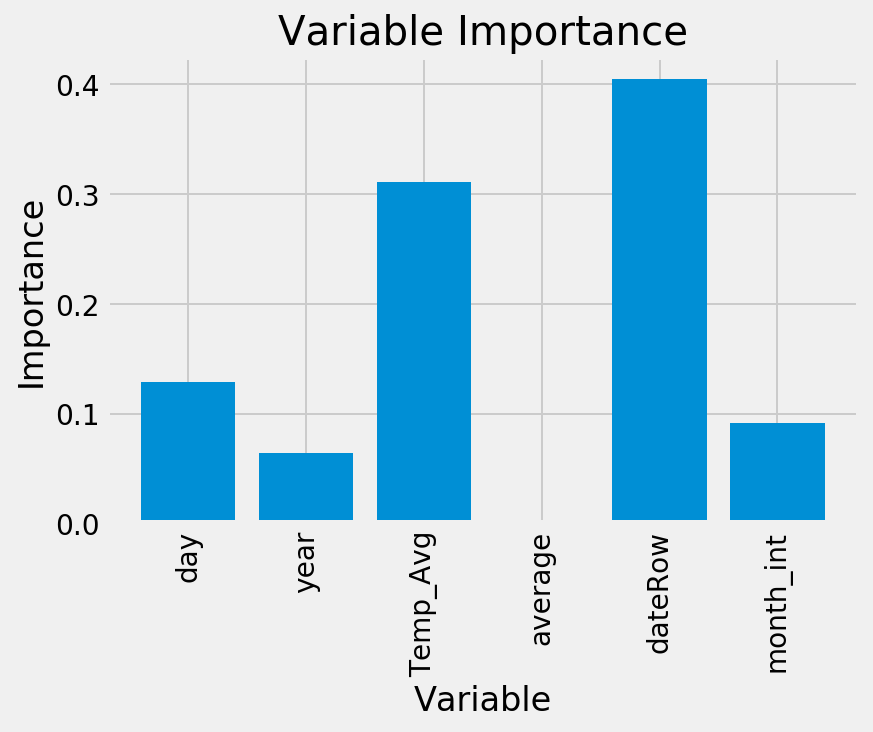

In [69]:
# # Set the style
plt.style.use('fivethirtyeight')

# list of x locationns for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable');
plt.title('Variable Importance');

# # list of x locations for plotting
# x_values = list()

          date  prediction
227 2013-01-02    4447.964
60  2013-01-04    3827.105
104 2013-01-05    3648.878
370 2013-01-20    3440.187
377 2013-01-25    3368.807
    actual       date  prediction
0     3752 2013-01-02    4447.964
1     3945 2013-01-04    3827.105
2     3420 2013-01-05    3648.878
3     3271 2013-01-20    3440.187
4     3526 2013-01-25    3368.807
5     3232 2013-01-27    3345.494
6     3491 2013-02-02    3398.728
7     3339 2013-02-08    3459.623
8     3773 2013-02-15    3587.962
9     3144 2013-02-17    3245.055
10    3208 2013-02-21    3355.731
11    3232 2013-02-23    3376.780
12    3629 2013-03-13    3530.378
13    3632 2013-03-15    3479.845
14    3232 2013-03-29    3402.448
15    3551 2013-04-04    3453.266
16    3346 2013-04-07    3525.684
17    3414 2013-04-13    3494.848
18    3567 2013-04-16    3602.741
19    3395 2013-04-23    3405.993



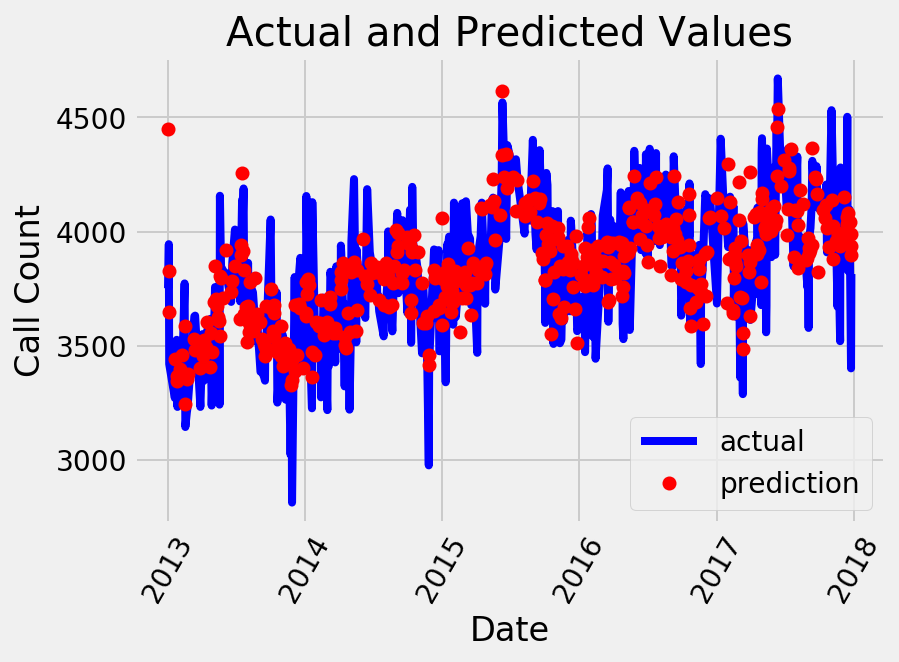

In [90]:
import datetime
# Graphing results

# Dates of training values
months = features[:, feature_list.index('month_int')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) 
         for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]


# Dataframe with true values and dates
#dates = features[:, feature_list.index('dateRow')]
true_data = pd.DataFrame(data = {'date': dates, 'actual':labels})


# Dates of predictions
months = test_features[:, feature_list.index('month_int')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) 
              for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date 
              in test_dates]
#test_dates = test_features[:, feature_list.index('dateRow')]


# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 
                                        'prediction':predictions})


#Henry D added this, just filtered out combines predictions and test_labels_actual
#  Intent is to just have "all_test_data" 
true_data = pd.merge(left=true_data, left_on='date',
                   right=predictions_data, right_on='date')
# ^ not 100% confident this is completely matching data would like to double check
# this is because bootstrapping/ensemble-ing may have added duplicates, or I may otherwise be dropping values that were in the testing set



# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 
         'ro', label = 'prediction')
plt.xticks(rotation = '60');
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Call Count');
plt.title('Actual and Predicted Values');


predictions_data.sort_values(by=['date'], inplace=True)
print(predictions_data.head(5))
print(true_data.head(20))
#print(test_features[1])
print()


In [71]:
feature_list

['day', 'year', 'Temp_Avg', 'average', 'dateRow', 'month_int']

In [86]:
# #print(predictions_data, true_data)
# print(predictions_data[:5])
# print(true_data[:5])
# # You see here the dates are not in order nor will they match 
#     #true data ⊇ predictions data  
#     # = true_data: {predictions_data+training_data}
#     # not sure about this now
# print("length of predictions_data_dates : ", len(predictions_data['date']))
# print("length of true_data_dates : ", len(true_data['date']))

          date  prediction
227 2013-01-02    4447.964
60  2013-01-04    3827.105
104 2013-01-05    3648.878
370 2013-01-20    3440.187
377 2013-01-25    3368.807
   actual       date
0    4897 2013-01-01
1    3752 2013-01-02
2    3993 2013-01-03
3    3945 2013-01-04
4    3420 2013-01-05
length of predictions_data_dates :  457
length of true_data_dates :  1826


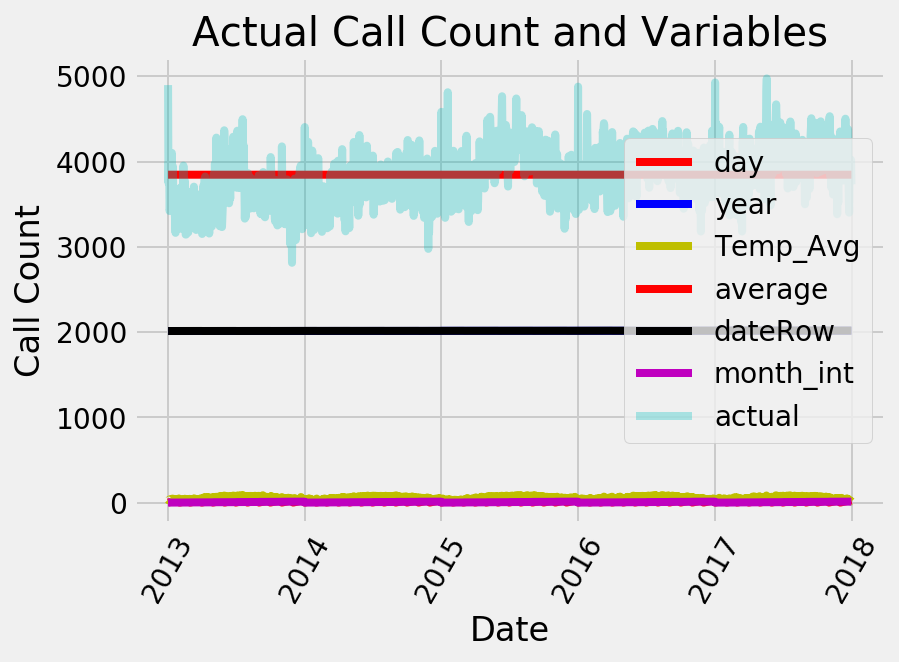

In [87]:
# Make the data accessible for plotting
color_map = {1:'r-', 2:'b-', 3:'y-', 4:'r-', 5:'k-', 6:'m-',7:'c-',8:'g-',
             9:'w-'}

# True_data had to be changed back to the entire dataset, not just test
months = features[:, feature_list.index('month_int')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) 
         for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

true_data = pd.DataFrame(data = {'date': dates, 'actual':labels})

features_to_graph = ['average'] #'dateRow'
#average and actual 
counter = 1
for metric in feature_list:   # features_to_graph 
    true_data[metric] = features[:, feature_list.index(metric)]
    plt.plot(true_data['date'], true_data[metric], color_map[counter],
            label = metric, alpha = 1.0)
    counter += 1;
    
plt.plot(true_data['date'], labels, color_map[counter],
            label = 'actual', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Labels and title
plt.xlabel('Date'); plt.ylabel('Call Count');
plt.title('Actual Call Count and Variables');

# Plot all the data as lines
